- importing packages

In [1]:
import pandas as pd

- loading the required datasets

In [2]:
data=pd.read_csv("calories.csv")

In [3]:
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
data.shape

(15000, 2)

In [14]:
data_1=pd.read_csv("exercise.csv")

In [15]:
data_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


- making them into one data set

In [24]:
df=pd.merge(data_1,data,on="User_ID")

In [25]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


- checking quality of the data

In [26]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

- remove unwanted columns

In [28]:
df=df.drop(["User_ID"],axis=1)

In [29]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


- convert categorical values into numerical

In [30]:
df["Gender"]=df["Gender"].map({"male":0,"female":1})

In [31]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


- distributions

In [32]:
import matplotlib.pyplot as plt

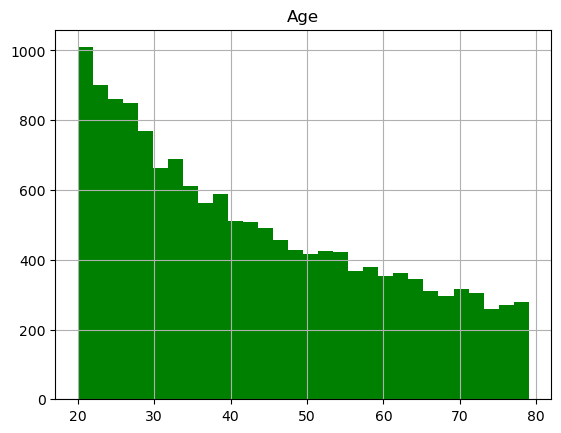

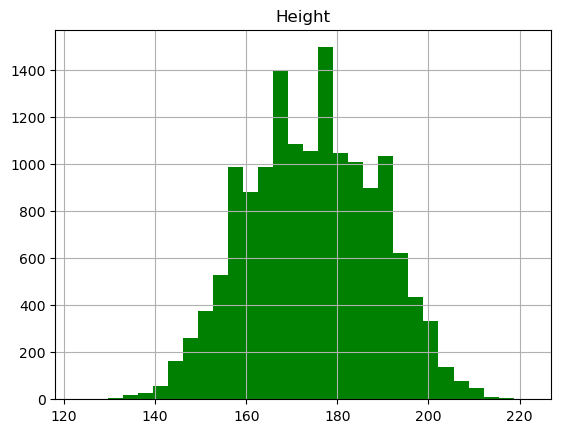

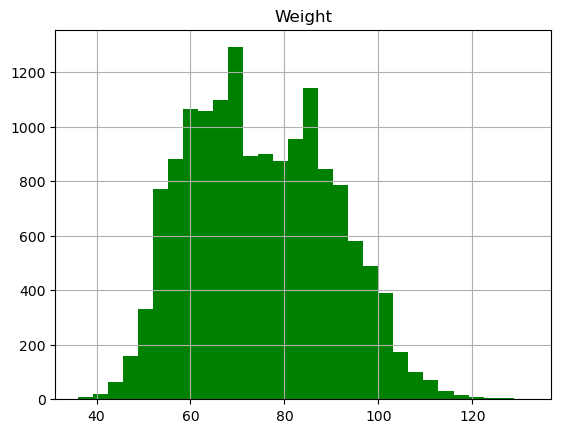

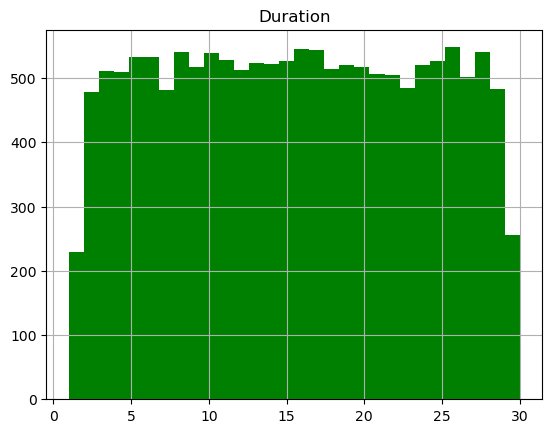

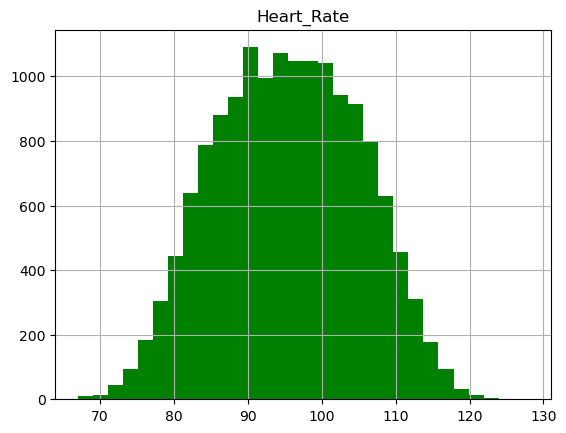

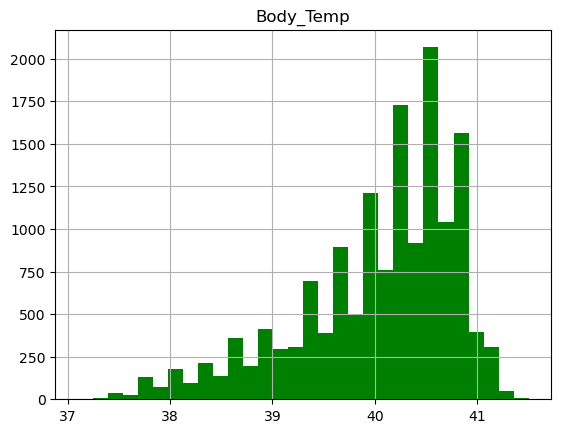

In [35]:
for i in df.columns:
    if i=="Gender" or i=="Calories":
        pass
    else:
        df[i].hist(bins=30,color="g")
        plt.title(i)
        plt.show()

In [45]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

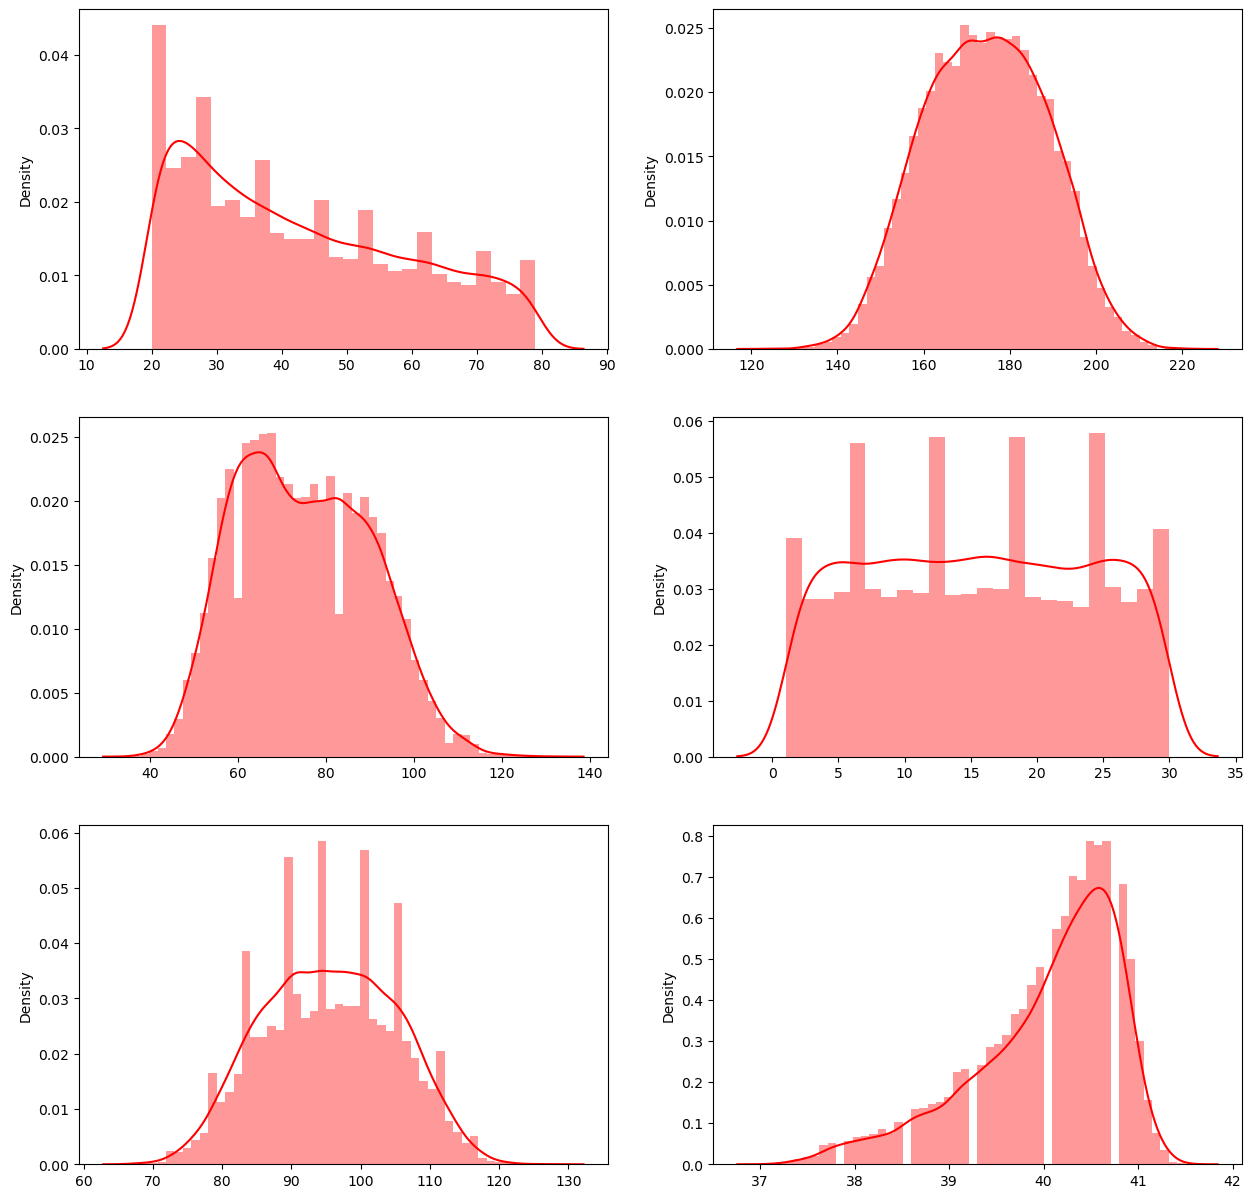

In [57]:
important=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']
fig,ax=plt.subplots(3,2,figsize=(15,15))
for i,j in zip(important,ax.flatten()):
    sns.distplot(x=df[i],ax=j,color="red")
   
    
plt.show()

- to convert into normal distribution
 - scaling
 - variable transformation

- splitting the data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

- Model development

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg=LinearRegression()

In [63]:
reg.fit(X_train,y_train)

LinearRegression()

In [64]:
reg.coef_

array([  1.37736727,   0.49954826,  -0.17984834,   0.29769877,
         6.61981819,   1.99372814, -16.94785453])

In [67]:
reg.intercept_

461.57085928573156

- Train Accuracy

In [68]:
y_train_pred=reg.predict(X_train)

In [69]:
y_train_pred

array([ 83.5520717 ,  81.84599565, 143.72775558, ...,  46.39588578,
        61.91224034,  68.38705463])

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(y_train,y_train_pred)

0.9676004204744926

- Test Accuracy

In [76]:
y_test_pred=reg.predict(X_test)

In [77]:
y_test_pred

array([170.57288049, 192.11306598,  56.15350808, ...,   9.16714006,
       171.24764866,  76.50120096])

In [78]:
r2_score(y_test,y_test_pred)

0.9663701348612177

- Saving Model 

In [79]:
import pickle

In [80]:
with open("calories.pkl","wb") as f:
    pickle.dump(reg,f)

# now pickle file is our model